In [1]:
import torch
import matplotlib.pyplot as plt

from tqdm import tqdm

from rbm import *

In [2]:
device = torch.device('cpu')

### Data

In [3]:
mnist_train = torch.cat((
    torch.load('mnist_train0.pt'), torch.load('mnist_train1.pt')
)).flatten(1).float()
dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=16, shuffle=True)

mnist_test = torch.load('mnist_test.pt').flatten(1).float()

### Model

In [4]:
n_visible = 784
n_hidden = 128
k = 8

rbm = RBM(n_visible, n_hidden)
rbm.to(device);

### Train

In [5]:
optimizer = torch.optim.Adam(rbm.parameters(), lr=0.001)
MSE = nn.MSELoss()

losses = []

100%|█████████████████████████████████████████████████████████████████████████████████████████| 3750/3750 [00:12<00:00, 306.40it/s]


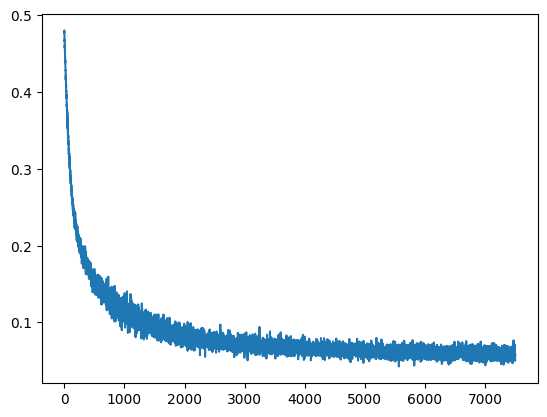

In [6]:
for ep in range(2):
    for v in tqdm(dataloader):
        optimizer.zero_grad()
        v = v.to(device)

        loss = MSE(v, rbm(v, k=k))
        loss.backward()
        optimizer.step()
        
        losses.append(float(loss))
        
plt.plot(losses)

### Test: Reconstruction

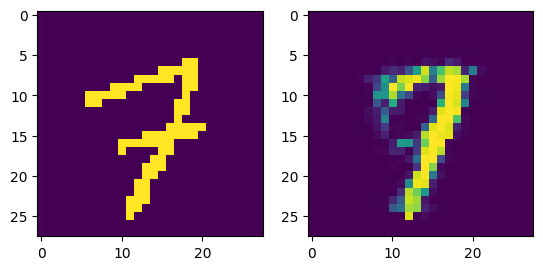

In [7]:
fig, (ax00, ax01) = plt.subplots(1, 2)

# Sample from dataset
i = torch.randint(mnist_test.size(0), (1, ))
v_0 = mnist_test[i].unsqueeze(0)

v = rbm(v_0, k=k)

ax00.imshow(v_0.reshape(28, 28).detach())
ax01.imshow(v.reshape(28, 28).detach())

### Test: Generation

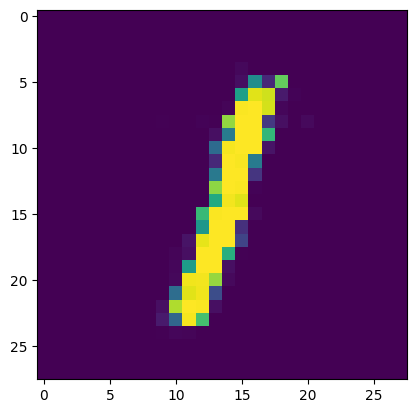

In [8]:
fig, ax = plt.subplots()

h_0 = (torch.rand((1, n_hidden)) < 0.5).float()

v = rbm(rbm.v_given_h(h_0), k=32)

ax.imshow(v.reshape(28, 28).detach())